# Домашнее задание 
Анализ данных

# Pro

Возьмите базу квартир (moscow.csv). Проведите парсинг и очистку данных. Проанализируйте зависимость стоимости квартир от различных параметров (количество комнат, станции метро и т. д.). Постройте графики.


In [ ]:
# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import datetime                 # Импортируем модуль datetime для обработки данных в формете даты
import numpy as np              # Импортируем библиотеку numpy
from google.colab import files  # Импортируем библиотеку files для работы с файлами
import re                       # Регулярные выражения
import csv
import seaborn as sns # Будем визулизировать данные этой библиотекой

# Рисовать графики сразу же
%matplotlib inline

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mos = pd.read_csv('/content/drive/MyDrive/moscow.csv',  sep=";") 

In [ ]:
mos.head()

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
1,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
3,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."


In [ ]:
mos = mos.drop(mos[mos['Комнат'].str.contains('Для заметок', na=False)].index, axis = 0) # Убираю строки “Для заметок”
mos = mos.drop(mos.columns[[8,9,11,12,13]],axis=1 ) # удаляем неинтересующие нас столбцы: ГРМ, Бонус агенту, Кол-во дней в экспозицииБ,	 Источник и Примечание
mos = mos.drop(mos[mos['Комнат'].str.contains('\d\d.\w\w\w', na=False)].index, axis = 0) # Удаляю выбросы - даты вместо количества комнат
mos = mos.drop(mos[mos['Площадь'].str.contains('\d\d.\d\d.\d\d\d\d', na=False)].index, axis = 0)   # Удаляю выбросы - даты вместо площади
mos['Площадь кухни'] =mos['жилая площадь'] = mos['Площадь']
mos = mos.rename(columns={"Площадь": "Общая площадь"})
mos

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Общая площадь,"Цена, руб.",Дата,Площадь кухни,жилая площадь
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,25.07.2019,64.1/23/20,64.1/23/20
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,25.07.2019,38.4/17/9,38.4/17/9
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,25.07.2019,38.2/19.9/9.9,38.2/19.9/9.9
6,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,25.07.2019,38/15/7,38/15/7
8,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,25.07.2019,34/17/8,34/17/8
...,...,...,...,...,...,...,...,...,...,...,...
252526,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,12.07.2019,19.8/?/?,19.8/?/?
252528,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,23.07.2019,20.4/18/?,20.4/18/?
252530,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,12.07.2019,15.4/13.2/?,15.4/13.2/?
252532,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,22.07.2019,26/10.9/7,26/10.9/7


In [ ]:
def getsquare(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[0]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
def getLive(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[1]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
def getKitchen(i):         # Преобразовал код в функцию
  i=re.split(r'/', i)
  arg=i[2]
  if arg != '?':
    arg=np.float_(arg)
    i = arg
    return i

In [ ]:
mos['Общая площадь'] = mos['Общая площадь'].apply(getsquare)
mos['жилая площадь'] = mos['жилая площадь'].apply(getLive)
mos['Площадь кухни'] = mos['Площадь кухни'].apply(getKitchen)
mos['Этаж']=mos['Дом']

In [ ]:
def getLevel(i):         # Преобразовал код в функцию
  i=re.split(r' ', i)
  arg=i[0]
  if arg != '?':
    i = arg
    return i

In [ ]:
mos['Этаж'] = mos['Этаж'].apply(getLevel)

In [ ]:
def getType(i):         # Преобразовал код в функцию
  i=re.split(r' ', i)
  arg=i[1]
  i = arg
  return i

In [ ]:
mos['Дом'] = mos['Дом'].apply(getType)

In [ ]:
# Тип дома
def getFullType(arg):
  result = ''
  if ("М" in arg): result += 'монолитный'
  if ("К" in arg):  result += 'кирпичный'
  if ("П" in arg):  result += 'панельный'
 
  if result=='?':
    result='Не указано'
  return result

In [ ]:
mos['Дом'] = mos['Дом'].apply(getFullType)

In [ ]:
mos

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Общая площадь,"Цена, руб.",Дата,Площадь кухни,жилая площадь,Этаж
0,1,Шелепиха м.,12п,монолитный,NaN,2,64.1,19500000.0,25.07.2019,20.0,23.0,35/37
2,1,Пятницкое шоссе м.,30т,панельный,Л,Р,38.4,4800000.0,25.07.2019,9.0,17.0,11/14
4,1,Планерная м.,5т,панельный,Б,С,38.2,7990000.0,25.07.2019,9.9,19.9,11/22
6,1,Шаболовская м.,12п,,Б,Р,38.0,11200000.0,25.07.2019,7.0,15.0,8/12
8,1,Бабушкинская м.,15п,панельный,NaN,С,34.0,6250000.0,25.07.2019,8.0,17.0,4/14
...,...,...,...,...,...,...,...,...,...,...,...,...
252526,Ст,Некрасовка м.,4п,панельный,NaN,NaN,19.8,2850000.0,12.07.2019,NaN,NaN,2/17
252528,Ст,Авиамоторная м.,6п,кирпичный,NaN,С,20.4,3839990.0,23.07.2019,NaN,18.0,2/8
252530,Ст,Коломенская м.,15п,панельный,NaN,NaN,15.4,2900000.0,12.07.2019,NaN,13.2,1/9
252532,Ст,Алтуфьево м.,5т,монолитный,NaN,NaN,26.0,5200000.0,22.07.2019,7.0,10.9,4/9


In [ ]:
mos['вид транспорта'] = mos['От станции'].str.extract(r'(\D+)', expand=False) 

In [ ]:
# От станции
def getTransp(arg):
  arg = str(arg)
  result = ''
  if ("п" in arg): result += 'минут пешком'
  if ("т" in arg):  result += 'минут на транспорте'

 
 
  if result=='':
    result='Не указано'
  return result

In [ ]:
mos['время'] = mos['От станции'].str.extract(r'(\d+)', expand=False) 
mos['вид транспорта'] = mos['вид транспорта'].apply(getTransp)
#mos['От станции'] =mos['время']+mos['вид транспорта']
#mos.drop('время', axis=1, inplace=True) # Удаляем колонку date из датафрейма
#mos.drop('вид транспорта', axis=1, inplace=True) # Удаляем колонку date из датафрейма

In [ ]:
mos['Цена, млн руб.'] = mos['Цена, руб.']/1000000
mos.drop('Цена, руб.', axis=1, inplace=True) # Удаляем колонку date из датафрейма
mos.drop('Дата', axis=1, inplace=True) # Удаляем колонку date из датафрейма

In [ ]:
mos

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Общая площадь,Площадь кухни,жилая площадь,Этаж,вид транспорта,время,"Цена, млн руб."
0,1,Шелепиха м.,12п,монолитный,NaN,2,64.1,20.0,23.0,35/37,минут пешком,12,19.50000
2,1,Пятницкое шоссе м.,30т,панельный,Л,Р,38.4,9.0,17.0,11/14,минут на транспорте,30,4.80000
4,1,Планерная м.,5т,панельный,Б,С,38.2,9.9,19.9,11/22,минут на транспорте,5,7.99000
6,1,Шаболовская м.,12п,,Б,Р,38.0,7.0,15.0,8/12,минут пешком,12,11.20000
8,1,Бабушкинская м.,15п,панельный,NaN,С,34.0,8.0,17.0,4/14,минут пешком,15,6.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252526,Ст,Некрасовка м.,4п,панельный,NaN,NaN,19.8,NaN,NaN,2/17,минут пешком,4,2.85000
252528,Ст,Авиамоторная м.,6п,кирпичный,NaN,С,20.4,NaN,18.0,2/8,минут пешком,6,3.83999
252530,Ст,Коломенская м.,15п,панельный,NaN,NaN,15.4,NaN,13.2,1/9,минут пешком,15,2.90000
252532,Ст,Алтуфьево м.,5т,монолитный,NaN,NaN,26.0,7.0,10.9,4/9,минут на транспорте,5,5.20000


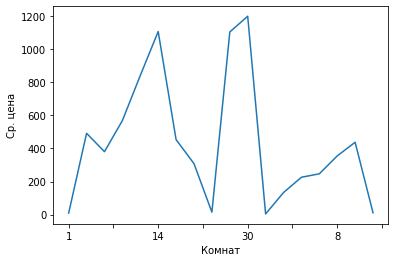

In [ ]:
# Средняя цена от количества комнат
mos.groupby('Комнат')['Цена, млн руб.'].mean().plot()
plt.xlabel('Комнат')
plt.ylabel('Ср. цена')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


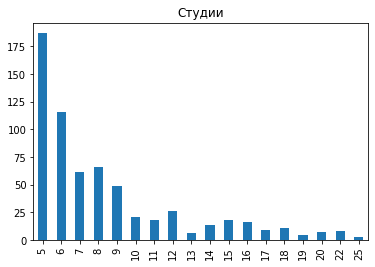

In [ ]:
# Отсортируем количество предложений по возрастанию цены при количестве предложений более 150
plot = mos[mos['Комнат' ] == 'Ст'][mos.groupby('Цена, млн руб.')\
        ['Цена, млн руб.'].transform('size') > 150]['Цена, млн руб.'].astype('int').value_counts().\
        sort_index().plot(kind='bar', label='средняя цена') 
plt.title('Студии')                                       
plt.show()

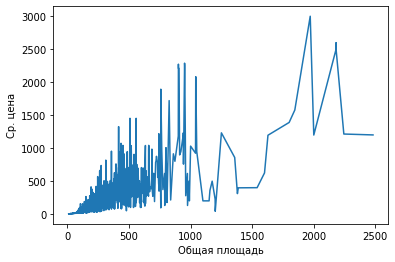

In [ ]:
# Средняя цена от общей площади
mos.groupby('Общая площадь')['Цена, млн руб.'].mean().plot()
plt.xlabel('Общая площадь')
plt.ylabel('Ср. цена')
plt.show()

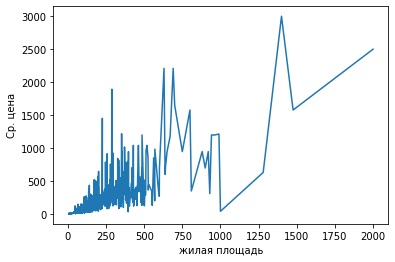

In [ ]:
# Средняя цена от жилой площади
mos.groupby('жилая площадь')['Цена, млн руб.'].mean().plot()
plt.xlabel('жилая площадь')
plt.ylabel('Ср. цена')
plt.show()

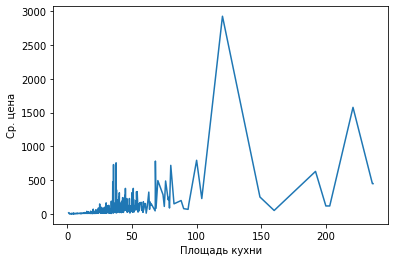

In [ ]:
# Средняя цена от площади кухни
mos.groupby('Площадь кухни')['Цена, млн руб.'].mean().plot()
plt.xlabel('Площадь кухни')
plt.ylabel('Ср. цена')
plt.show()

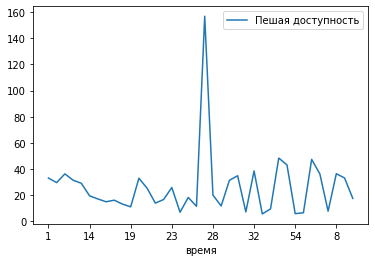

In [ ]:
mos[mos['вид транспорта'].str.contains('минут пешком')].groupby('время')['Цена, млн руб.'].mean().plot(label='Пешая доступность')
plt.legend()
plt.show()

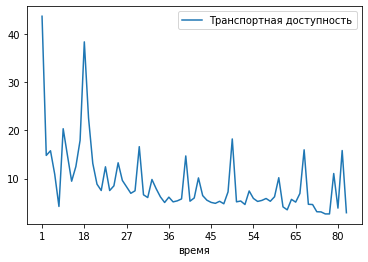

In [ ]:
mos[mos['вид транспорта'].str.contains('минут на транспорте')].groupby('время')['Цена, млн руб.'].mean().plot(label='Транспортная доступность')
plt.legend()
plt.show()

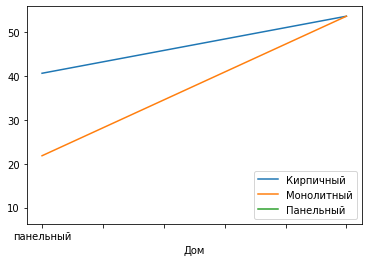

In [ ]:
mos[mos['Дом'].str.contains('кирпичный')].groupby('Дом')['Цена, млн руб.'].mean().plot(label='Кирпичный')
mos[mos['Дом'].str.contains('монолитный')].groupby('Дом')['Цена, млн руб.'].mean().plot(label='Монолитный')
mos[mos['Дом'].str.contains('панельный')].groupby('Дом')['Цена, млн руб.'].mean().plot(label='Панельный')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


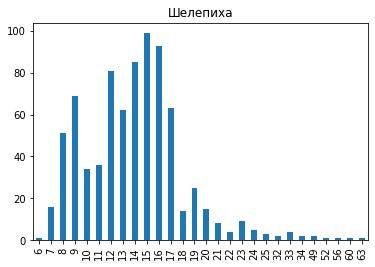

In [ ]:
# Отсортируем количество предложений по возрастанию цены
plot = mos[mos['Метро / ЖД станции' ] == 'Шелепиха м.'][mos.groupby('Цена, млн руб.')\
        ['Цена, млн руб.'].transform('size') > 1]['Цена, млн руб.'].astype('int').value_counts().\
        sort_index().plot(kind='bar', label='средняя цена') 
plt.title('Шелепиха')                                       
plt.show()

In [ ]:
mos['Метро / ЖД станции'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


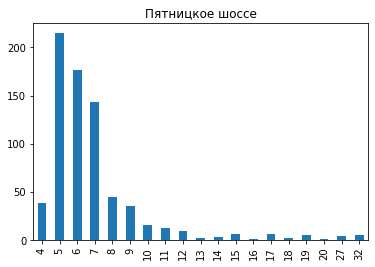

In [ ]:
# Отсортируем количество предложений по возрастанию цены
plot = mos[mos['Метро / ЖД станции' ] == 'Пятницкое шоссе м.'][mos.groupby('Цена, млн руб.')\
        ['Цена, млн руб.'].transform('size') > 100]['Цена, млн руб.'].astype('int').value_counts().\
        sort_index().plot(kind='bar', label='средняя цена') 
plt.title('Пятницкое шоссе')                                       
plt.show()

In [ ]:
mos.Комнат.unique()

array(['1', nan, '2', '5', '6', '7', '8', '10', '9', '14', '13', '11',
       '15', '16', '12', '20', '30', '4', 'Ст'], dtype=object)

In [ ]:
mos_filtered = mos[(mos['Общая площадь'] <= 90) & (mos['Цена, млн руб.'] <= 10)] 
# Сделаем выборку квартир на м. П ланерная общей площадью до 90 кв.м. и ценой до 
#10 млн. руб.

ValueError: ignored

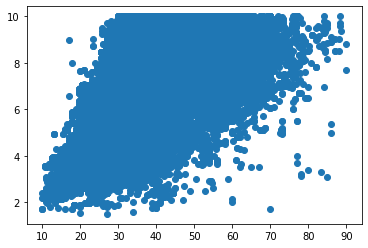

In [ ]:
plt.scatter(mos_filtered['Общая площадь'], mos_filtered['Цена, млн руб.'])
mos_filtered_sq = mos_filtered[mos_filtered['Метро / ЖД станции'].str.contains
                               ('Планерная м.')]
plt.scatter(mos_filtered_sq['Общая площадь'], mos_filtered_sq['Цена, млн руб.'])
plt.xlabel('Общая площадь')
plt.ylabel('Цена, млн руб.')
plt.show()

In [ ]:
mos['Метро / ЖД станции'].unique()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


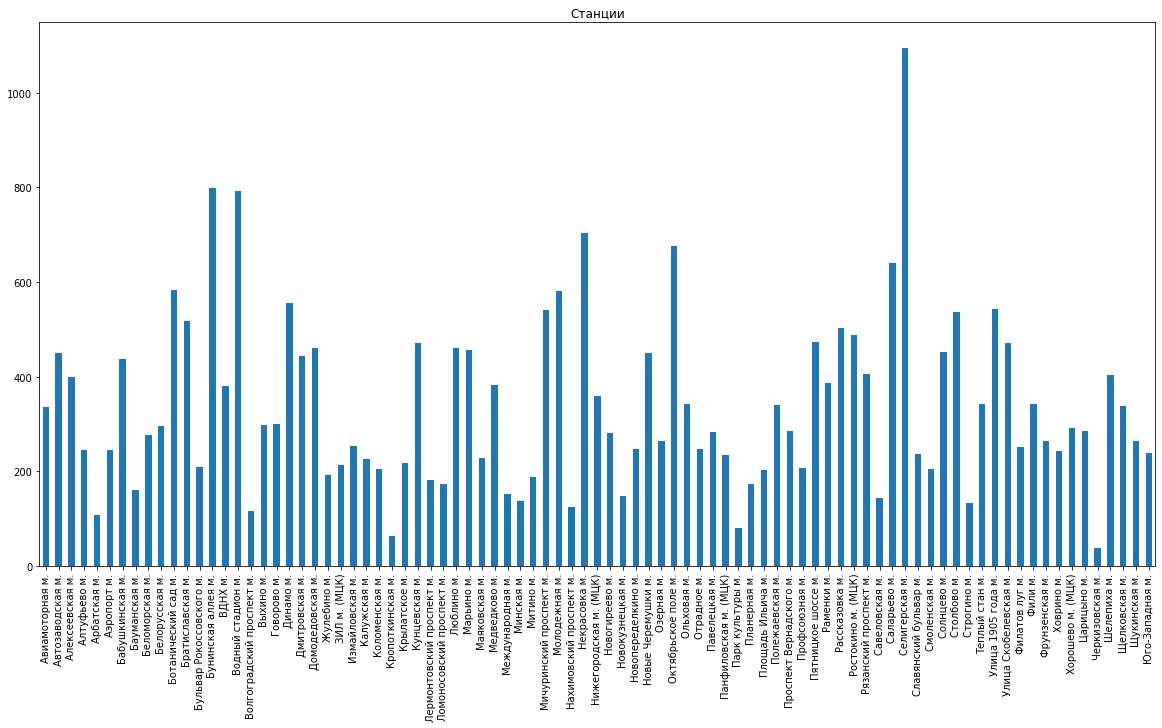

In [ ]:
# Отсортируем количество предложений 2 комнатных квартир по станциям
plot = mos[mos['Комнат' ] == '2'][mos.groupby('Метро / ЖД станции')\
        ['Метро / ЖД станции'].transform('size') > 500]['Метро / ЖД станции'].astype('str').value_counts().\
        sort_index().plot(kind='bar', label='Количество') 
plt.title('Станции')                                       
plt.show()

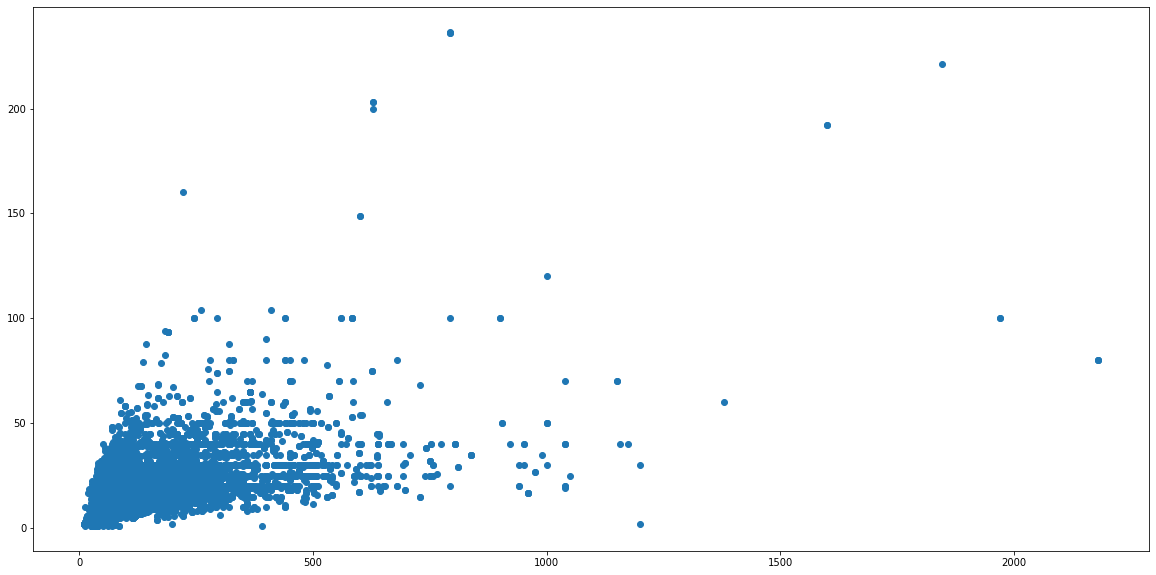

In [ ]:
# Посмотрим пропорции площади кухни к общей площади.
plt.scatter(x=mos['Общая площадь'], y=mos['Площадь кухни'])